# Customer_Segmentation_USML

In [2]:
#  Import the required Library for the Project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

##  Data Collection and Analysis Part

In [3]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
# Find the how many number of rows and columns.
dataset.shape

#  There are 200 rows or 5 columns.

(200, 5)

In [6]:
#  Getting the features information.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#  Check the missing or null value for each of the columns.
dataset.isnull().sum()
# The dataset does not contain the missing value/

In [10]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# Choosing the annual Income column and the spending score column.
x = dataset.iloc[:,[3,4]].values
x.shape

(200, 2)

## Choosing the number of Clusters for the algorithm
WCSS -> Within Clusters Sum of Squares.

In [19]:
# Finding wcss value for different number of clusters.
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [20]:
#  Plot the elbow graph to find which cluster have minimum wcss
sns.set()

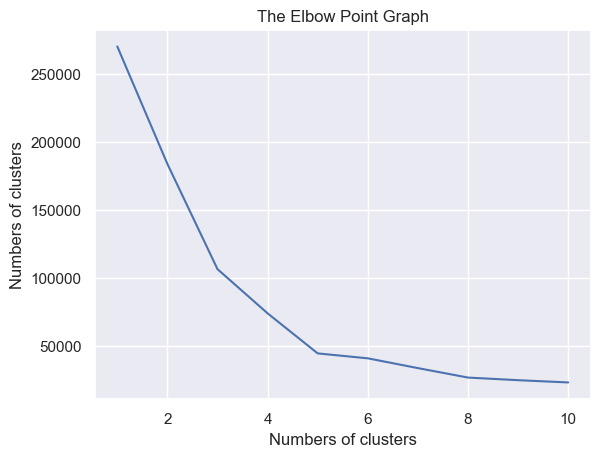

In [22]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Numbers of clusters")
plt.ylabel("Numbers of clusters")
plt.show()

In [27]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Optimum Number of Clusters = 5

## Training the K=Means clustering model

In [25]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#  return a label for each data point based on their clusters.
y = kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### Visualizing all the clusters
 5 Clusters --> 0, 1 ,2 , 3, 4

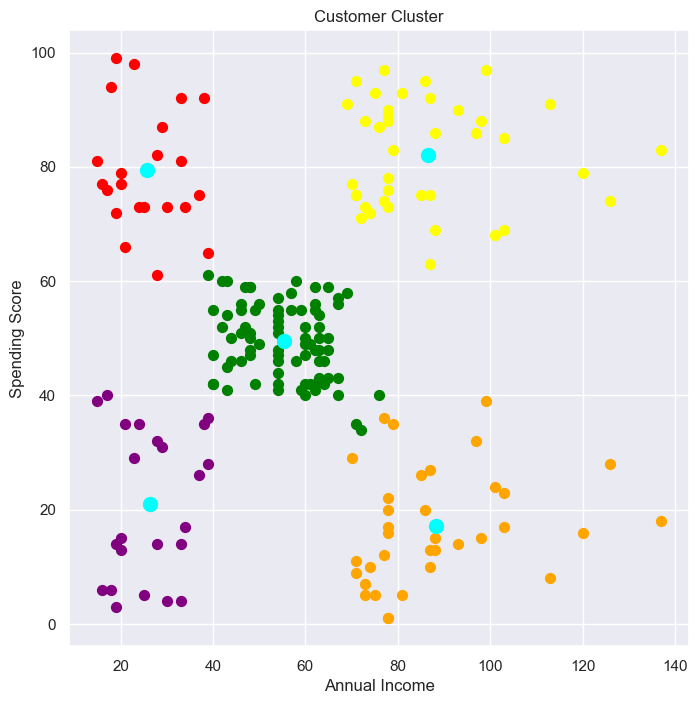

<Figure size 640x480 with 0 Axes>

In [29]:
#  Plotting all the clusters with their respective centroids.
plt.figure(figsize=(8,8))
plt.scatter(x[y==0, 0], x[y==0,1], s = 50, c='green', label = 'Cluster 1')
plt.scatter(x[y==1, 0], x[y==1,1], s = 50, c='yellow', label = 'Cluster 2')
plt.scatter(x[y==2, 0], x[y==2,1], s = 50, c='orange', label = 'Cluster 3')
plt.scatter(x[y==3, 0], x[y==3,1], s = 50, c='purple', label = 'Cluster 4')
plt.scatter(x[y==4, 0], x[y==4,1], s = 50, c='red', label = 'Cluster 5')

#  Plot the centroids.
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'cyan', label = 'Centroids')
plt.title("Customer Cluster")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
plt.savefig("Cluster.jpg")